# Auxiliary modules

In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pylab import *
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

%autosave 180

def show_gallery(images, n_rows, n_cols=10):
    '''Show photos from set
    
    Args:
        images[k,m,n]: set of k images m*n
        n_rows (int): rows to show
        n_cols (int): columns to show in each row
    '''
    images = array(images)
    n_imgs = shape(images)[0]
    n_rows = min(n_rows, int(ceil(n_imgs/n_cols)))
    grid_size = (n_rows, n_cols)
    figure(figsize=reversed(grid_size))
    for i,j in itertools.product(range(n_rows), range(n_cols)):
        subplot2grid(grid_size, (i, j), colspan=1, rowspan=1, aspect="auto")
        if i*n_cols+j<n_imgs:
            imshow(images[i*n_cols+j], cmap='gray', interpolation="nearest")
        xticks(())
        yticks(())
        axis("off")
        grid(False)
        
    subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    show()
    
def show_text_imgs(images, text):
    # 1. Main image
    figure(figsize=(2,2))
    imshow(images[0], cmap='gray')
    xticks(())
    yticks(())
    axis("off")
    grid(False)
    show()
    # 2. Others
    images = array(images[1:])
    n_imgs = shape(images)[0]
    n_cols = 8
    n_rows = int(ceil((n_imgs+1)/n_cols))
    grid_size = (3*n_rows, 4*n_cols)
    figure(figsize=reversed(grid_size))
    for i,j in itertools.product(range(n_rows), range(n_cols)):
        if i*n_cols+j <= n_imgs:
            ax=subplot2grid(grid_size, (3*i+1, 4*j), colspan=1, rowspan=1, aspect="auto")
            ax.text(0.5, 0.5, text[i*n_cols+j], ha="center", va="center", fontsize=30, transform=ax.transAxes)
            xticks(())
            yticks(())
            axis("off")
            grid(False)
        if i*n_cols+j < n_imgs:
            subplot2grid(grid_size, (3*i, 4*j+1), colspan=3, rowspan=3, aspect="auto")
            imshow(images[i*n_cols+j], cmap='gray', interpolation="nearest")
            xticks(())
            yticks(())
            axis("off")
            grid(False)
    show()
    
    
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

class MeanClassifier():
    def __init__(self):
        self.clf = KNeighborsClassifier(1)
    
    def fit(self, X, y):
        targets = set(y)
        objects = []
        for target in targets:
            x = [X[i] for i in len(y) if y[i]==target]
            n = len(x)
            objects += [sum(x, axis=0)/n]
        self.clf.fit(objects, targets)
        
    def predict(self, X):
        return self.clf.predict(X)
        
'''Classifiers'''
ESTIMATORS = {
    'Log.Regression': LogisticRegression(),
    '   Naive Bayes': GaussianNB(),
    '5 Near.Neighb.': KNeighborsClassifier(5),
    '3 Near.Neighb.': KNeighborsClassifier(3),
    '1 Near.Neighb.': KNeighborsClassifier(1),
    ' Random Forest': RandomForestClassifier(),
    '   Extra Trees': ExtraTreesClassifier(),
    '           SVM': LinearSVC(),
    'SVM+cram.sing.': LinearSVC(multi_class='crammer_singer'),
    'SVM+rad.bas.f.': SVC()
}

def broken_stick(s, par=1):
    eigs = s**2
    c = sum(eigs)
    e = eigs/c
    n = len(eigs)
    l = [sum([1/j for j in range(i+1,n+1)])/n for i in range(n)]
    k = 1
    for i in range(1, n):
        if e[i] < l[i]:
            k = i
            break
    return k

def eps_rank(s, eps=1):
    k = 1
    n = len(s)
    for i in range(1, n):
        if s[i] <= eps:
            k = i
            break
    return k

def kaiser(s, alpha=0.95):
    eigs = s**2
    c = sum(eigs)
    n = len(eigs)
    k = 1
    for i in range(1, n):
        if sum(eigs[:i]) > alpha*c:
            k = i
            break
    return k
       
'''Principal Component Number Estimators'''
PCN = {
    'Brocken Stick': lambda s, a: broken_stick(s, a),
    'Epsilon Rank': lambda s, a: eps_rank(s, a),
    'Kaiser': lambda s, a: kaiser(s, a),
    'Manual': lambda s, a: a,
    'Full': lambda s, a: len(s)
}

Autosaving every 180 seconds


# Datasets

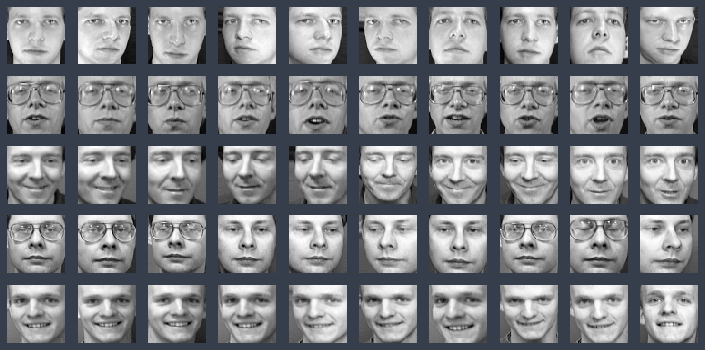

In [3]:
'''ORL dataset: 400 = 40 * 10'''
data = fetch_olivetti_faces()
X = data.images
y = data.target

show_gallery(X, 5)

# Algirithms

In [4]:
class EigenFaces(object):
    """A customer of ABC Bank with a checking account. Customers have the
    following properties:
    
    Attributes:
        name: A string representing the customer's name.
        balance: A float tracking the current balance of the customer's account."""
    def Face2vec(self, faces): return array([self.face2vec(f) for f in faces])
    def face2vec(self, face): return concatenate(face)
    
    def Project(self, faces): return array([self.project(f) for f in faces])
    def project(self, face): 
        if self.vec: 
            return self.A[:,:self.dim].T@self.face2vec(face-self.mean)
        else:
            return self.A[:,:self.dim[0]].T@face@self.B[:,:self.dim[1]]
        
    def Reject(self, projects): return array([self.reject(p) for p in projects])
    def reject(self, project): 
        if self.vec:
            return reshape(self.A[:,:self.dim]@project,(self.n_rows,self.n_cols))+self.mean
        else:
            return self.A[:,:self.dim[0]]@project@self.B[:,:self.dim[1]].T+self.mean
    
    def Approx(self, faces): return self.Reject(self.Project(faces))
    def approx(self, face): return self.reject(self.project(face))
    
    def show_factors(self, face, lim=200, positive=False):
        '''Rang truncation
        
        Args:
            face (m*n): image for factorization
            sum_only (bool): represent as sum or sum and difference?'''
            
        # Step 1. Set of images and set of operators ('+0.8', '=')
        proj = vectorize(lambda x: round(x, 1))(self.project(face))
        eigenfaces = [face, self.approx(face), self.mean]
        coords = ['≈', '=']
        if positive:
            coords += ['+ '+str(abs(p)) for p in proj]
            eigenfaces += [reshape(self.A[:,i], (self.n_rows, self.n_cols))*sign(proj[i]+1e-9) 
                           for i in range(self.dim)]
        else:
            coords += ['- '+str(abs(p)) if p<0 else '+ '+str(abs(p)) for p in proj]
            eigenfaces += [reshape(self.A[:,i], (self.n_rows, self.n_cols)) 
                           for i in range(self.dim)]
        
        # Step 2. Show results
        if len(coords) > lim:
            coords[lim] = '+ ...'
        show_text_imgs(eigenfaces[:lim+1], coords[:lim+1])
            
            
    def __init__(self, X, vectorization=True, decomposition='svd'):
        '''Class initialization
        
        Args:
            X[k,m,n]: set of k images m*n pixels each
            vectorization (bool): True for PCA, False for 2DPCA
            decomposition (string): 'eig'/'svd' for spectral decomposition/svd'''
        self.vec = vectorization
        self.dec = decomposition
        self.n_rows = shape(X)[1]
        self.n_cols = shape(X)[2]
        self.dim = shape(X)[0]
        self.clf_name = '1-NN'
        
        # 1. Centering
        k = self.dim
        self.mean = sum(X, axis=0)/k
        F = array([x-self.mean for x in X])
        
        # 2. PCA
        if self.vec:
            # 3a 1DPCA
            # 3a.1 Vectorization
            V = self.Face2vec(F)
            # 3a.2 Decomposition
            if self.dec=='eig':
                # 3a.2a Spectral decomposition
                Cov = V.T @ V
                l1, v = np.linalg.eigh(Cov)
                self.A = v.T[::-1,...][:k].T
                self.sigma1 = vectorize(sqrt)(l1[::-1,...][:k])
            elif self.dec=='svd':
                # 3a.2b Singular value decomposition
                u, self.sigma1, v = np.linalg.svd(V, full_matrices=False)
                self.A = v.T
        else:
            # 3b 2DPCA
            # 3b.1 Decomposition
            if self.dec=='eig':
                # 3b.1a Spectral decompositions
                Cov_rows = sum([face @ face.T for face in F], axis=0)
                Cov_cols = sum([face.T @ face for face in F], axis=0)
                l1, v1 = np.linalg.eigh(Cov_rows)
                l2, v2 = np.linalg.eigh(Cov_cols)
                self.A = v1.T[::-1,...].T
                self.B = v2.T[::-1,...].T
                self.sigma1 = vectorize(sqrt)(l1[::-1,...])
                self.sigma2 = vectorize(sqrt)(l2[::-1,...])
            elif self.dec=='svd':
                # 3b.1b Singular value decompositions
                F_rows = hstack(F)
                F_cols = vstack(F).T
                u1, self.sigma1, v1 = np.linalg.svd(F_rows, full_matrices=False)
                u2, self.sigma2, v2 = np.linalg.svd(F_cols, full_matrices=False)
                self.A = u1
                self.B = u2
        
        # 3. Low-rank approximation
        self.trunc()
        print(self.dim)
        
    def trunc(self, method='Brocken Stick', param=0.95, message=False):
        '''Rang truncation
        
        Args:
            method (string): how to find number of principal components?
            param (float/int): some parameter for this method'''
        if self.vec:
            self.dim = PCN[method](self.sigma1, param)
        else:
            if type(param) in [int, float]:
                param = (param, param)
            self.dim = (PCN[method](self.sigma1, param[0]), PCN[method](self.sigma2, param[1]))
        if message:
            print(self.dim)
        return self
        
    def fit(self, X, y, classifier='SVM'):
        self.clf_name = classifier
        self.clf = ESTIMATORS[classifier].fit(self.Project(X), y)
        return self
            
    def fitup(self, X, y):
        """
        
        """
        return 1

    def predict(self, X):
        return self.clf.predict(Project(X))

# Experiments

## EigenFaces experiments

##### Выделим ортогональное подпространство в векторизованных изображениях лиц

In [8]:
EF = EigenFaces(X)

18


##### Выясним, как аппроксимируются cлучайные лица из выборки при изменении числа главных компонент

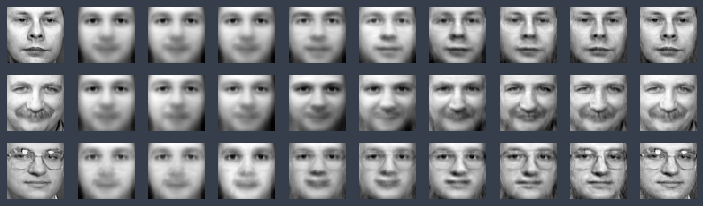

Слева оригиналы, далее 1-,2-,4-,8-,...,128-,256-ранговые аппроксимации


In [50]:
indices = np.random.choice(400, 3, replace=False)
approximations = []
for i in indices:
    face = X[i]
    approximations += [face]
    for b in range(9):
        approximations += [EF.trunc('Manual', 2**b).approx(face)]

show_gallery(approximations, 3, 10)
print('Слева оригиналы, далее 1-,2-,4-,8-,...,128-,256-ранговые аппроксимации')

#### 50 оттенков бреда
##### Представим новое лицо в нашем базисе

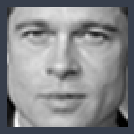

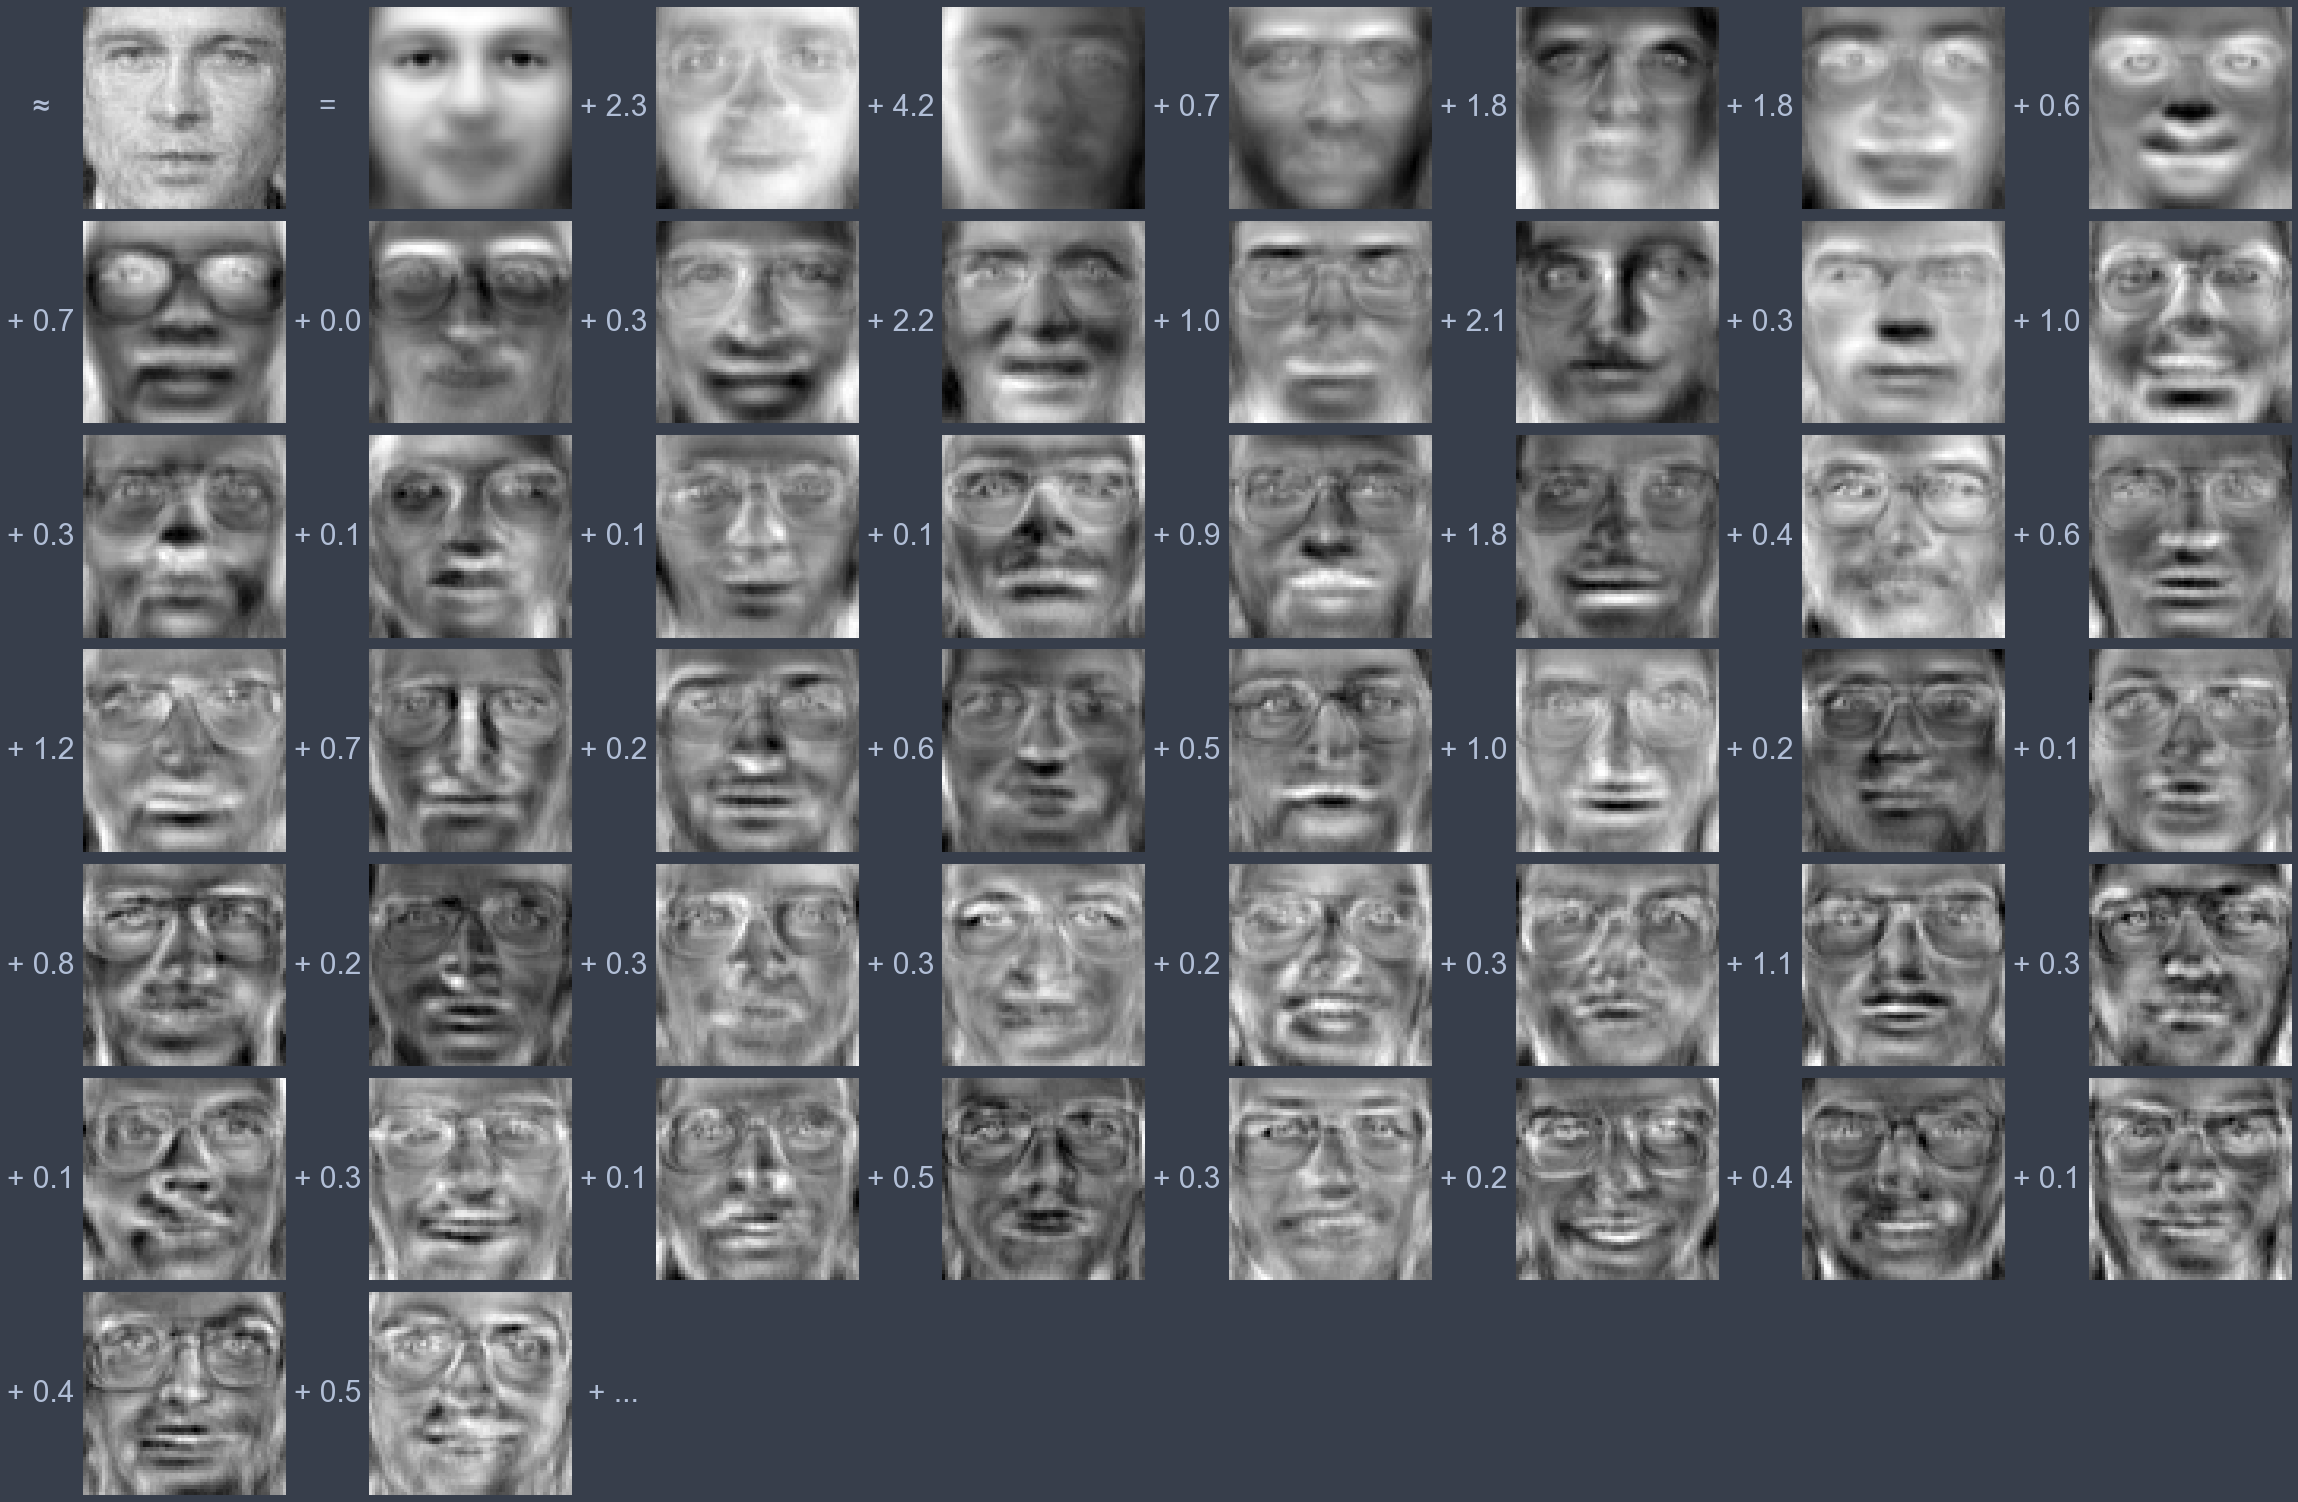

Левее всего оригинал, далее 1-,2-,4-,8-,...,128-,400-ранговая аппроксимации


In [10]:
from skimage import io

bred = io.imread('data/bred.png', as_grey=True)
EF.trunc('Full').show_factors(bred, 50, positive=True)

#### Кросс-валидация
##### Сравним эффективность распознавания с использованием различных классификаторов

[5, 10, 18, 30, 40, 50]
TRAIN SAMPLE: 360 
TEST SAMPLE: 40
Log.Regression... 1.3 sec, max: 98.33% (40 components)
   Naive Bayes... 0.2 sec, max: 88.33% (30 components)
5 Near.Neighb.... 0.1 sec, max: 83.33% (40 components)
3 Near.Neighb.... 0.1 sec, max: 86.67% (30 components)
1 Near.Neighb.... 0.1 sec, max: 93.33% (50 components)
 Random Forest... 0.5 sec, max: 78.33% (18 components)
   Extra Trees... 0.4 sec, max: 82.5% (18 components)
           SVM... 2.7 sec, max: 98.33% (40 components)
SVM+cram.sing.... 3.4 sec, max: 98.33% (30 components)
SVM+rad.bas.f.... 0.6 sec, max: 92.5% (40 components)


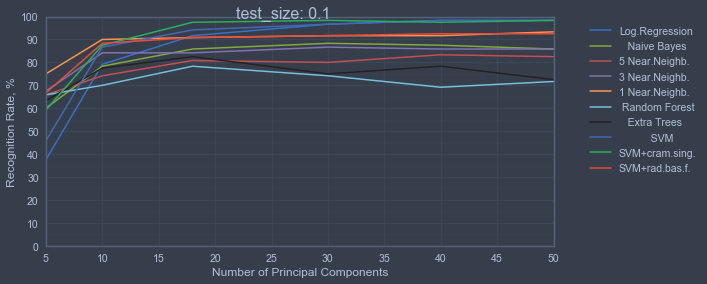

TRAIN SAMPLE: 200 
TEST SAMPLE: 200
Log.Regression... 0.7 sec, max: 93.33% (50 components)
   Naive Bayes... 0.2 sec, max: 62.83% (18 components)
5 Near.Neighb.... 0.2 sec, max: 65.0% (50 components)
3 Near.Neighb.... 0.2 sec, max: 75.0% (50 components)
1 Near.Neighb.... 0.2 sec, max: 87.33% (50 components)
 Random Forest... 0.5 sec, max: 64.0% (18 components)
   Extra Trees... 0.4 sec, max: 67.67% (18 components)
           SVM... 2.0 sec, max: 92.33% (50 components)
SVM+cram.sing.... 2.7 sec, max: 94.5% (50 components)
SVM+rad.bas.f.... 0.4 sec, max: 84.0% (40 components)


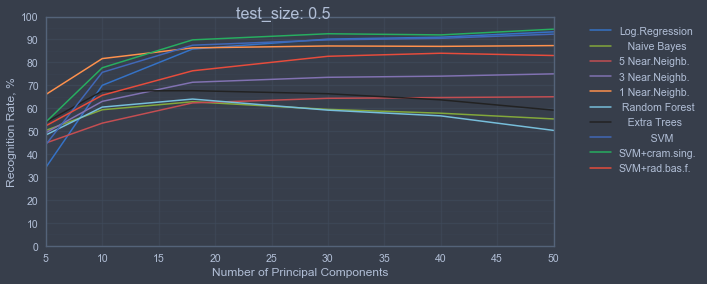

TRAIN SAMPLE: 120 
TEST SAMPLE: 280
Log.Regression... 0.4 sec, max: 81.43% (50 components)
   Naive Bayes... 0.2 sec, max: 37.02% (18 components)
5 Near.Neighb.... 0.2 sec, max: 46.19% (30 components)
3 Near.Neighb.... 0.1 sec, max: 54.76% (50 components)
1 Near.Neighb.... 0.1 sec, max: 75.95% (50 components)
 Random Forest... 0.4 sec, max: 44.88% (10 components)
   Extra Trees... 0.3 sec, max: 56.19% (18 components)
           SVM... 1.4 sec, max: 80.6% (50 components)
SVM+cram.sing.... 1.0 sec, max: 82.98% (50 components)
SVM+rad.bas.f.... 0.3 sec, max: 55.83% (50 components)


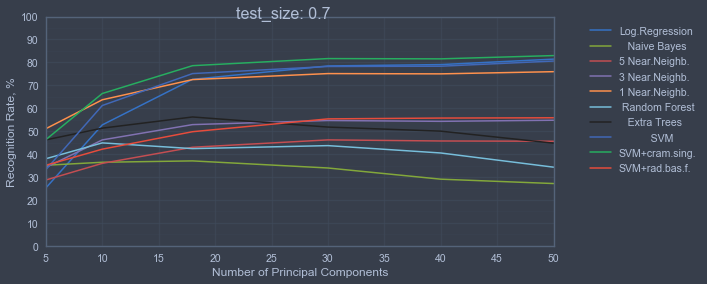

TRAIN SAMPLE: 80 
TEST SAMPLE: 320
Log.Regression... 0.3 sec, max: 66.77% (50 components)
   Naive Bayes... 0.2 sec, max: 20.52% (10 components)
5 Near.Neighb.... 0.2 sec, max: 30.62% (30 components)
3 Near.Neighb.... 0.2 sec, max: 39.27% (50 components)
1 Near.Neighb.... 0.1 sec, max: 62.19% (50 components)
 Random Forest... 0.4 sec, max: 34.06% (10 components)
   Extra Trees... 0.3 sec, max: 43.65% (18 components)
           SVM... 1.0 sec, max: 65.83% (50 components)
SVM+cram.sing.... 0.6 sec, max: 68.96% (50 components)
SVM+rad.bas.f.... 0.3 sec, max: 36.67% (30 components)


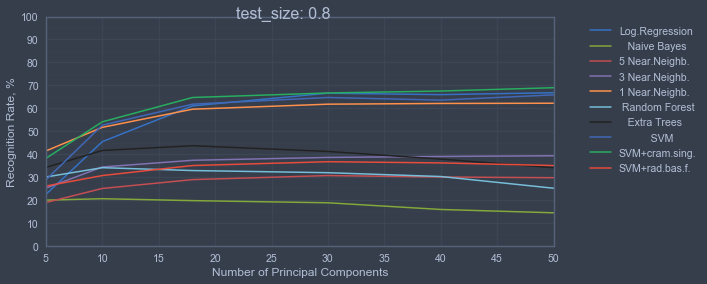

TRAIN SAMPLE: 40 
TEST SAMPLE: 360
Log.Regression... 0.2 sec, max: 45.93% (50 components)
   Naive Bayes... 0.2 sec, max: 8.89% (5 components)
5 Near.Neighb.... 0.1 sec, max: 14.35% (30 components)
3 Near.Neighb.... 0.1 sec, max: 20.19% (18 components)
1 Near.Neighb.... 0.1 sec, max: 41.02% (50 components)
 Random Forest... 0.4 sec, max: 22.13% (18 components)
   Extra Trees... 0.4 sec, max: 31.48% (18 components)
           SVM... 0.4 sec, max: 44.81% (50 components)
SVM+cram.sing.... 0.3 sec, max: 44.63% (50 components)
SVM+rad.bas.f.... 0.2 sec, max: 20.65% (40 components)


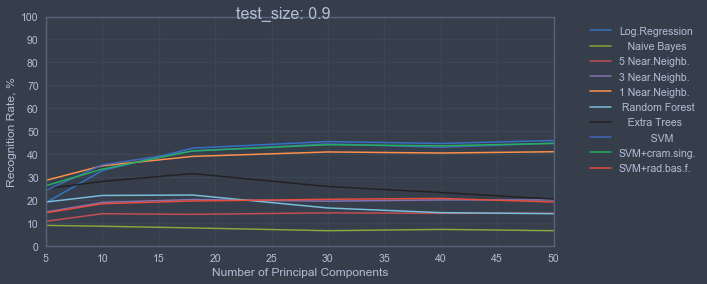

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from time import time

tr = [5,
      10,
      EF.trunc('Brocken Stick').dim,
      EF.trunc('Manual', 30).dim,
      EF.trunc('Kaiser', 0.85).dim,
      50]
print(tr)

for test_size in [0.1, 0.5, 0.7, 0.8, 0.9]:
    scores = []
    names = []
    Kt = int(400*test_size)
    print('TRAIN SAMPLE:',400-Kt, '\nTEST SAMPLE:',Kt)
    for name,clf in ESTIMATORS.items():
        print(name,end='... ')
        T0 = time()
        score = []
        for t in tr:
            cv = ShuffleSplit(n_splits=3, test_size=test_size, random_state=42)
            score += [average(cross_val_score(clf, EF.trunc('Manual',t).Project(X), 
                                              y, cv=cv, scoring='accuracy'))]
        scores += [score]
        names += [name]
        print(round(time()-T0,1),' sec, max: ',round(max(score)*100,2),
              '% (',tr[np.argmax(score)],' components)',sep='')
    
    fig = plt.figure()                                                               
    ax = fig.add_subplot(1,1,1) 
    plt.suptitle('test_size: ' + str(test_size), fontsize=16)
    plt.ylabel('Recognition Rate, %')
    plt.xlabel('Number of Principal Components')
    for i in range(len(names)):
        ax.plot(tr, 100*array(scores[i]), label=names[i])
        ax.set_xlim([min(tr), max(tr)])
        ax.set_ylim([0, 100])
        ax.major_ticks = np.arange(0, 101, 10)                                              
        ax.minor_ticks = np.arange(0, 101, 5)                                               
                                          
        ax.set_yticks(ticks=ax.major_ticks)                                                       
        ax.set_yticks(ticks=ax.minor_ticks, minor=True)    
        ax.grid(which='minor', alpha=0.2)
        ax.grid(which='major', alpha=0.5)
        
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width, box.height])
        ax.legend(bbox_to_anchor=(1.3, 1.0))
    plt.show()

##### 3-мерное подпространство лиц

<IPython.core.display.Javascript object>


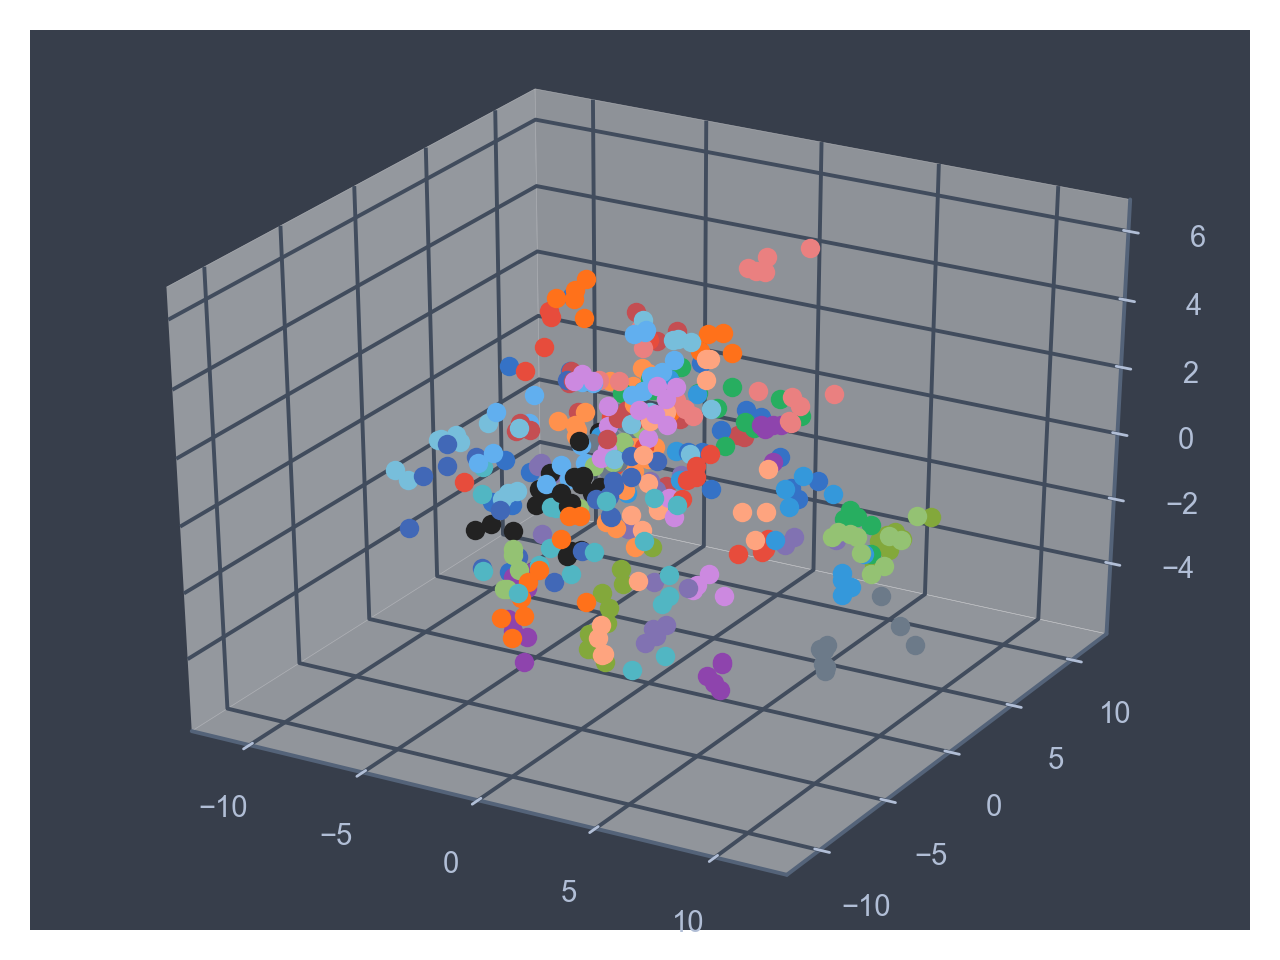

In [53]:
from mpl_toolkits.mplot3d import Axes3D


P = EF.trunc('Manual', 3).Project(X)
P, y

%matplotlib nbagg
figure()
gca(projection='3d')
for i in range(400):
    plot(P[10*i:10*i+10,0], P[10*i:10*i+10,1], P[10*i:10*i+10,2], 'o')
show()

## 2DPCA experiments

In [57]:
%matplotlib inline

E2 = EigenFaces(X, vectorization=False)

(5, 4)


##### Случайные лица спроецируем на 10 строк, на 10 столбцов и на 10 строк и 10 столбцов

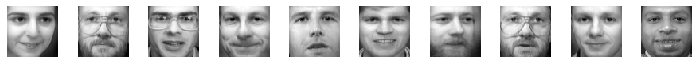

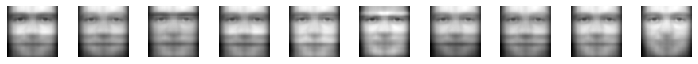

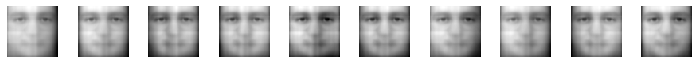

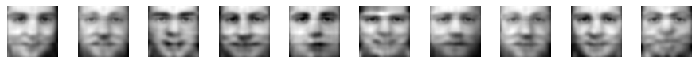

In [61]:
indices = np.random.choice(400, 10, replace=False)
faces = [X[i] for i in indices]

show_gallery(E2.trunc('Full').Approx(faces),1)
show_gallery(E2.trunc('Manual', [10, 1]).Approx(faces),1)
show_gallery(E2.trunc('Manual', [ 1,10]).Approx(faces),1)
show_gallery(E2.trunc('Manual', [10,10]).Approx(faces),1)

##### Выясним, как аппроксимируются cлучайные лица из выборки при изменении числа главных компонент

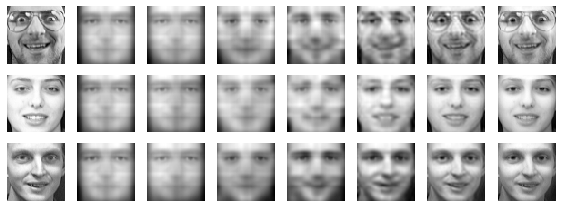

Слева оригиналы, далее (1,1)-,(2,2)-,(4,4)-,(8,8)-,...,(64,64)-ранговые аппроксимации


In [71]:
indices = np.random.choice(400, 3, replace=False)
approximations = []
for i in indices:
    face = X[i]
    approximations += [face]
    for b in range(7):
        approximations += [E2.trunc('Manual', (2**b, 2**b)).approx(face)]

show_gallery(approximations, 3, 8)
print('Слева оригиналы, далее (1,1)-,(2,2)-,(4,4)-,(8,8)-,...,(64,64)-ранговые аппроксимации')

#### Кросс-валидация
##### Сравним эффективность распознавания с использованием различных классификаторов

[(2, 3), (5, 4), (12, 10), (18, 18), (25, 26)]
[5, 9, 22, 36, 51]
TRAIN SAMPLE: 360 
TEST SAMPLE: 40
Log.Regression... 5.3 sec, max: 97.5% (22 components)
   Naive Bayes... 0.1 sec, max: 92.5% (9 components)
5 Near.Neighb.... 0.1 sec, max: 83.33% (22 components)
3 Near.Neighb.... 0.1 sec, max: 85.83% (22 components)
1 Near.Neighb.... 0.1 sec, max: 94.17% (22 components)
 Random Forest... 0.8 sec, max: 77.5% (9 components)
   Extra Trees... 0.3 sec, max: 85.83% (9 components)
           SVM... 11.7 sec, max: 97.5% (22 components)
SVM+cram.sing.... 116.2 sec, max: 97.5% (22 components)
SVM+rad.bas.f.... 1.1 sec, max: 92.5% (9 components)


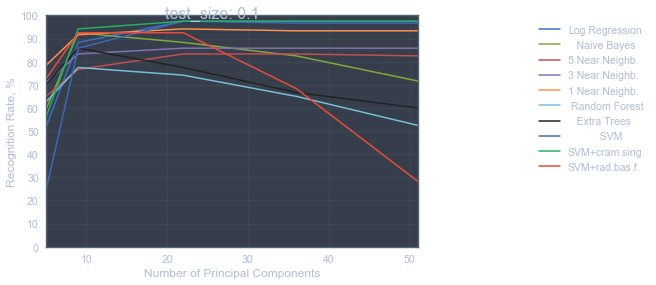

TRAIN SAMPLE: 200 
TEST SAMPLE: 200
Log.Regression... 2.7 sec, max: 90.67% (22 components)
   Naive Bayes... 0.2 sec, max: 65.17% (9 components)
5 Near.Neighb.... 0.2 sec, max: 63.33% (36 components)
3 Near.Neighb.... 0.2 sec, max: 73.5% (22 components)
1 Near.Neighb.... 0.2 sec, max: 88.67% (22 components)
 Random Forest... 0.7 sec, max: 63.17% (9 components)
   Extra Trees... 0.3 sec, max: 71.83% (9 components)
           SVM... 9.0 sec, max: 92.33% (51 components)
SVM+cram.sing.... 69.0 sec, max: 93.17% (36 components)
SVM+rad.bas.f.... 0.6 sec, max: 75.67% (9 components)


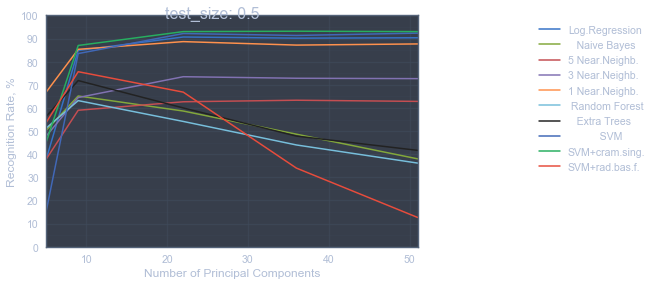

TRAIN SAMPLE: 120 
TEST SAMPLE: 280
Log.Regression... 1.5 sec, max: 80.0% (22 components)
   Naive Bayes... 0.3 sec, max: 35.12% (9 components)
5 Near.Neighb.... 0.2 sec, max: 45.12% (51 components)
3 Near.Neighb.... 0.2 sec, max: 54.64% (36 components)
1 Near.Neighb.... 0.2 sec, max: 75.6% (22 components)
 Random Forest... 0.4 sec, max: 45.6% (9 components)
   Extra Trees... 0.2 sec, max: 57.5% (9 components)
           SVM... 5.8 sec, max: 82.26% (22 components)
SVM+cram.sing.... 46.0 sec, max: 83.1% (51 components)
SVM+rad.bas.f.... 0.4 sec, max: 51.43% (9 components)


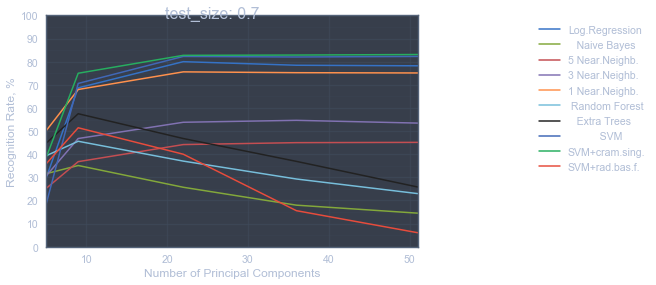

TRAIN SAMPLE: 80 
TEST SAMPLE: 320
Log.Regression... 0.9 sec, max: 64.38% (22 components)
   Naive Bayes... 0.3 sec, max: 20.21% (9 components)
5 Near.Neighb.... 0.2 sec, max: 29.9% (22 components)
3 Near.Neighb.... 0.2 sec, max: 39.48% (51 components)
1 Near.Neighb.... 0.2 sec, max: 62.4% (22 components)
 Random Forest... 0.3 sec, max: 35.42% (9 components)
   Extra Trees... 0.3 sec, max: 44.79% (9 components)
           SVM... 4.1 sec, max: 67.6% (22 components)
SVM+cram.sing.... 27.0 sec, max: 68.65% (22 components)
SVM+rad.bas.f.... 0.3 sec, max: 35.31% (9 components)


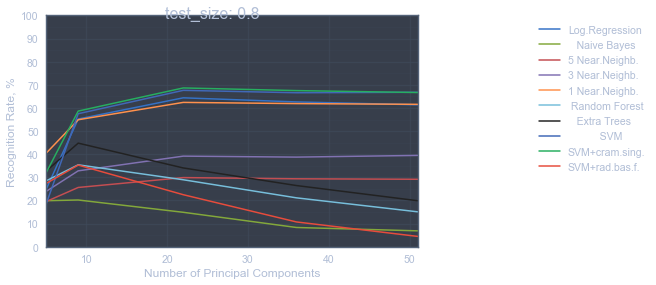

TRAIN SAMPLE: 40 
TEST SAMPLE: 360
Log.Regression... 0.3 sec, max: 41.85% (22 components)
   Naive Bayes... 0.2 sec, max: 10.0% (5 components)
5 Near.Neighb.... 0.1 sec, max: 14.72% (36 components)
3 Near.Neighb.... 0.1 sec, max: 20.37% (36 components)
1 Near.Neighb.... 0.1 sec, max: 40.74% (22 components)
 Random Forest... 0.3 sec, max: 23.33% (9 components)
   Extra Trees... 0.3 sec, max: 28.52% (9 components)
           SVM... 2.0 sec, max: 44.81% (22 components)
SVM+cram.sing.... 10.4 sec, max: 43.7% (22 components)
SVM+rad.bas.f.... 0.1 sec, max: 20.46% (9 components)


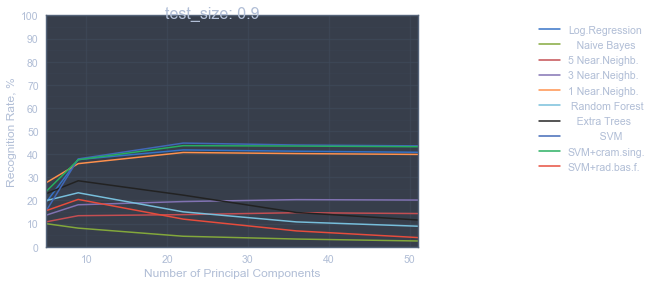

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from time import time

ranks = [(2,3),
         E2.trunc('Brocken Stick').dim,
         E2.trunc('Epsilon Rank', 20).dim,
         E2.trunc('Kaiser', 0.95).dim,
         E2.trunc('Epsilon Rank', 8).dim]
sranks = [sum(r) for r in ranks]
print(ranks)
print(sranks)

for test_size in [0.1, 0.5, 0.7, 0.8, 0.9]:
    scores = []
    names = []
    Kt = int(400*test_size)
    print('TRAIN SAMPLE:',400-Kt, '\nTEST SAMPLE:',Kt)
    for name,clf in ESTIMATORS.items():
        print(name, end='... ')
        T0 = time()
        score = []
        for t in ranks:
            cv = ShuffleSplit(n_splits=3, test_size=test_size, random_state=42)
            P = array(E2.trunc('Manual',t).Project(X))
            score += [average(cross_val_score(clf, vstack(P.T).T, y, cv=cv, scoring='accuracy'))]
        scores += [score]
        names += [name]
        print(round(time()-T0,1),' sec, max: ',round(max(score)*100,2),
              '% (',sranks[np.argmax(score)],' components)',sep='')
    
    fig = plt.figure()                                                               
    ax = fig.add_subplot(1,1,1) 
    plt.suptitle('test_size: ' + str(test_size), fontsize=16)
    plt.ylabel('Recognition Rate, %')
    plt.xlabel('Number of Principal Components')
    for i in range(len(names)):
        ax.plot(sranks, 100*array(scores[i]), label=names[i])
        ax.set_xlim([min(sranks), max(sranks)])
        ax.set_ylim([0, 100])
        ax.major_ticks = np.arange(0, 101, 10)                                              
        ax.minor_ticks = np.arange(0, 101, 5)                                               
                                          
        ax.set_yticks(ticks=ax.major_ticks)                                                       
        ax.set_yticks(ticks=ax.minor_ticks, minor=True)    
        ax.grid(which='minor', alpha=0.2)
        ax.grid(which='major', alpha=0.5)
        
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width, box.height])
        ax.legend(bbox_to_anchor=(1.3, 1.0))
    plt.show()